In [1]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
features = iris.data 
target = iris.target

sepal_length = np.array(features[:, 0])
petal_width = np.array(features[:, 3])

species_names = list()

for i in target:
    if i == 0:
        species_names.append('setosa')
    elif i == 1:
        species_names.append('versicolor')
    else:
        species_names.append('virginica')

In [3]:
def predict(intercept, coefficient, x):
    return intercept + coefficient * x

def predict_list(intercept, coefficient, dataset):
    return np.array([intercept + coefficient * x for x in dataset])

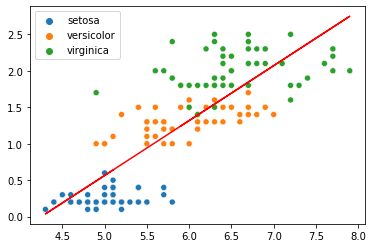

In [4]:
reg = LinearRegression().fit(X = sepal_length.reshape(-1,1), y = petal_width.reshape(-1,1))

sns.scatterplot(x = sepal_length, y = petal_width, hue = species_names)

plt.plot(
    sepal_length, 
    reg.intercept_[0] + reg.coef_[0][0] * features[:, 0], 
    color='red'
)

In [5]:
lr_predictions = reg.predict(sepal_length.reshape(-1,1))
lr_mse = mean_squared_error(lr_predictions, petal_width)
print(f"Linear Regression's MSE is {lr_mse}")

Linear Regression's MSE is 0.1910150076942736


# 1. Gradient Descent

In [6]:
gd_loss = pd.DataFrame(columns=['intercept', 'coefficient', 'sum_error'])

def gd(x, y, epochs, alpha = 0.01):
    length = len(x)
    intercept, coefficient = 0.0, 0.0
    for epoch in range(epochs):
        sum_error = 0.0
        predictions = predict_list(intercept, coefficient, x)
        b0_error = (1/length) * np.sum(predictions - y)
        b1_error = (1/length) * np.sum((predictions - y) * x)
        intercept = intercept - alpha * b0_error
        coefficient = coefficient - alpha * b1_error 
        sum_error = sum_error + np.sum((predictions - y) ** 2) / (2 * length)
        gd_loss.loc[epoch] = [intercept, coefficient, sum_error]
    return intercept, coefficient

## 1.1 1000 Iterations

Text(0.5, 1.0, 'GD Cost Function Over 1000 Iterations')

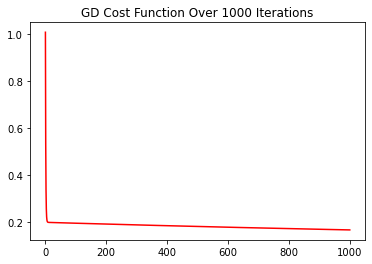

In [7]:
gd_intercept, gd_coefficient = gd(sepal_length, petal_width, epochs = 1000)
plt.plot(np.arange(1, 1001), gd_loss['sum_error'], color = 'r')
plt.title('GD Cost Function Over 1000 Iterations')

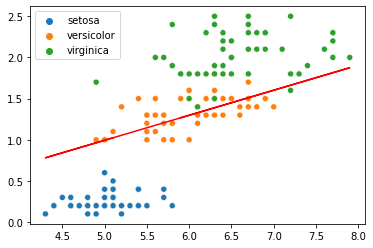

In [8]:
sns.scatterplot(
    x = sepal_length, 
    y = petal_width, 
    hue = species_names
)

plt.plot(
    sepal_length, 
    gd_intercept + gd_coefficient * sepal_length,
    color = 'r'
)

In [9]:
gd_predictions = [gd_intercept + gd_coefficient * x for x in sepal_length]

gd_mse = mean_squared_error(
    gd_predictions, 
    petal_width
)

print(f"The GD's MSE is {gd_mse}")

The GD's MSE is 0.3309592484431454


## 1.2 5000 Iterations

Text(0.5, 1.0, 'GD Cost Function Over 5000 Iterations')

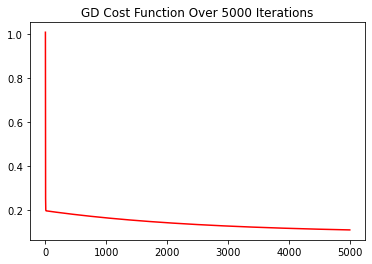

In [10]:
gd_intercept, gd_coefficient = gd(sepal_length, petal_width, epochs = 5000)
plt.plot(np.arange(1, 5001), gd_loss['sum_error'], color = 'r')
plt.title('GD Cost Function Over 5000 Iterations')

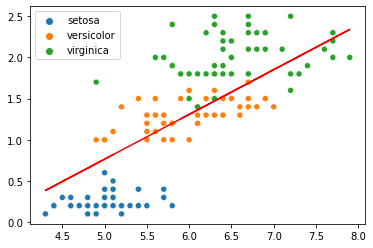

In [11]:
sns.scatterplot(
    x = sepal_length, 
    y = petal_width, 
    hue = species_names
)

plt.plot(
    sepal_length, 
    gd_intercept + gd_coefficient * sepal_length,
    color = 'r'
)

In [12]:
gd_predictions = [gd_intercept + gd_coefficient * x for x in sepal_length]

gd_mse = mean_squared_error(
    gd_predictions,
    petal_width
)

print(f"The GD's MSE is {gd_mse}")

The GD's MSE is 0.2215636705284282


## 1.2 10,000 Iterations

Text(0.5, 1.0, 'GD Cost Function Over 10000 Iterations')

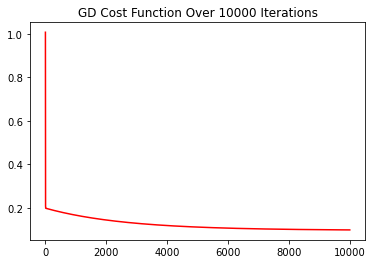

In [13]:
gd_intercept, gd_coefficient = gd(sepal_length, petal_width, epochs = 10000)
plt.plot(np.arange(1, 10001), gd_loss['sum_error'], color = 'r')
plt.title('GD Cost Function Over 10000 Iterations')

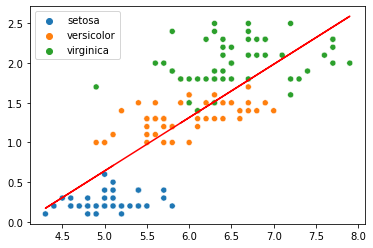

In [14]:
sns.scatterplot(
    x = sepal_length, 
    y = petal_width, 
    hue = species_names
)

plt.plot(
    sepal_length, 
    gd_intercept + gd_coefficient * sepal_length,
    color = 'r'
)

In [15]:
gd_predictions = [gd_intercept + gd_coefficient * x for x in sepal_length]

gd_mse = mean_squared_error(
    gd_predictions, 
    sepal_length
)

print(f"The GD's MSE is {gd_mse}")

The GD's MSE is 21.554862467818044


# 2. Mini Batch Gradient Descent

In [16]:
mbgd_loss = pd.DataFrame(columns=['b0', 'b1', 'loss'])

def mbgd(x, y, alpha = 0.01):
    pass

# 3. Stochastic Gradient Descent

In [17]:
sgd_loss = pd.DataFrame(columns=['intercept', 'coefficient', 'loss'])

def sgd(x,y, alpha = 0.01):
    intercept, coefficient= 0.0, 0.0
    sum_error = 0.0
    for i in range(len(x)):
        prediction = predict(intercept, coefficient, x[i])
        error = prediction - y[i]
        sum_error = error ** 2
        intercept = intercept - alpha * error
        coefficient = coefficient - alpha * error * x[i]
        sgd_loss.loc[i] = [intercept, coefficient, sum_error]
    return intercept, coefficient

sgd_intercept, sgd_coefficient = sgd(x = features[:, 0], y = features[:, 3])

Text(0.5, 1.0, 'SGD Loss Function Over Time')

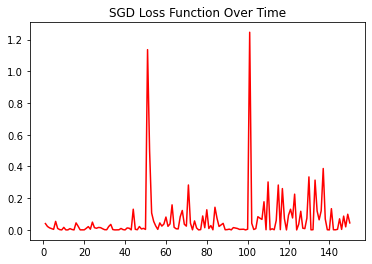

In [18]:
plt.plot(np.arange(1, len(features)+1), sgd_loss['loss'], color = 'r')
plt.title('SGD Loss Function Over Time')

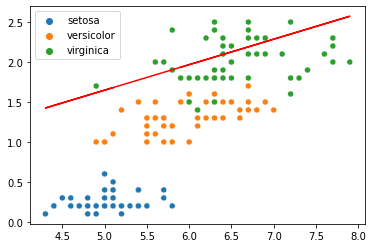

In [19]:
sns.scatterplot(
    x = sepal_length, 
    y = petal_width, 
    hue = species_names
)

plt.plot(
    sepal_length, 
    sgd_intercept + sgd_coefficient * sepal_length, 
    color = 'r'
)

In [20]:
sgd_predictions = [sgd_intercept + sgd_coefficient * x for x in sepal_length]

sgd_mse = mean_squared_error(
    sgd_predictions,
    petal_width
)

print(f"SGD's MSE is {sgd_mse}")

SGD's MSE is 0.8342065819559275
